In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _gaussian3d_func(t, x0):
    t = t[:, None, None]
    x0 = x0[:, None, None]
    
    return lambda x: np.exp(-np.sum((x - x0)**2 / (2 * t**2), axis=0))

In [3]:
def _weight_func(t, px, py):
    t, px, py = np.atleast_1d(t, px, py)
    
    def _w(x):
        dx = [di(x) for di in d]
        out = dx
        for i in range(1, len(d)):
            out *= 1 - np.roll(dx, i, axis=0)
            
        return out
    
    d = [_gaussian3d_func(t, np.array([px[i], py[i]])) for i in range(len(px))]
    
    return _w

In [21]:
def _sample_vector_normals(px, py, qx, qy):
    px, py, qx, qy = np.atleast_1d(px, py, qx, qy)
    
    out = np.array([qx - px, qy - py])
    return out / np.linalg.norm(out, axis=0)

In [27]:
def _velocity_func(t, px, py, qx, qy):
    def _v(x):
        wx = _weight_func(t, px, py)(x)
        return np.sum(wx[None, :, :, :] * v_norms[:, :, None, None], axis=1) / np.sum(wx, axis=0)
        
    v_norms = _sample_vector_normals(px, py, qx, qy)
    
    return _v

In [67]:
px = np.array([0.2, 0.45, 0.7])
py = np.array([0.4, 0.3, 0.3])
t = [1, 1]

qx = np.array([0.4, 0.3, 0.7])
qy = np.array([0.2, 0.7, 0.1])

x1 = np.linspace(0, 1, 11)
y1 = np.linspace(0, 1, 11)
x = np.meshgrid(x1, y1)

In [68]:
w = _weight_func(t, px, py)

In [69]:
wx = w(x)
wx.shape

(3, 11, 11)

In [70]:
vdx, vdy = [qx - px, qy - py] / np.linalg.norm([qx - px, qy - py], axis=0)
vd = np.array([vdx, vdy])

In [71]:
vdx, vdy = wx[None, :, : ,:] * vd[:, :, None, None]
vd = np.array([vdx, vdy])

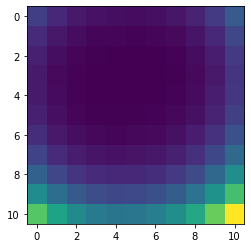

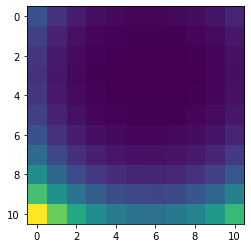

In [72]:
plt.imshow(np.sum(wx, axis=0))
plt.figure()
plt.imshow(wx[0])

In [73]:
s = x + np.sum(vd, axis=1) / np.sum(wx, axis=0)

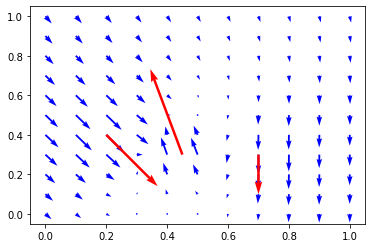

In [74]:
plt.quiver(*x, *(s-x), color='blue', scale_units='xy', scale=10)
plt.quiver(px, py, qx-px, qy-py, color='red', scale_units='xy', scale=1)

In [75]:
px, py = [0.3, 0.6], [0.3, 0.6]
qx, qy = [0.6, 0.3], [0.6, 0.3]

px, py, qx, qy = np.atleast_1d(px, py, qx, qy)

v = _velocity_func(t, px, py, qx, qy)

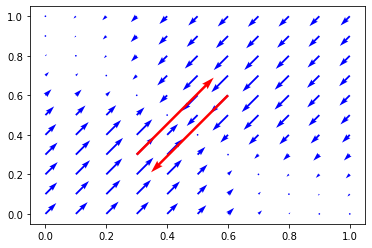

In [78]:
plt.quiver(*x, *v(x), color='blue', scale_units='xy', scale=10)
plt.quiver(px, py, qx-px, qy-py, color='red', scale_units='xy', scale=1)